In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml


In [4]:
titanic = fetch_openml("titanic", version=1, as_frame=True)
df = titanic.frame

In [6]:
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


## Histogram

<Figure size 1000x500 with 0 Axes>

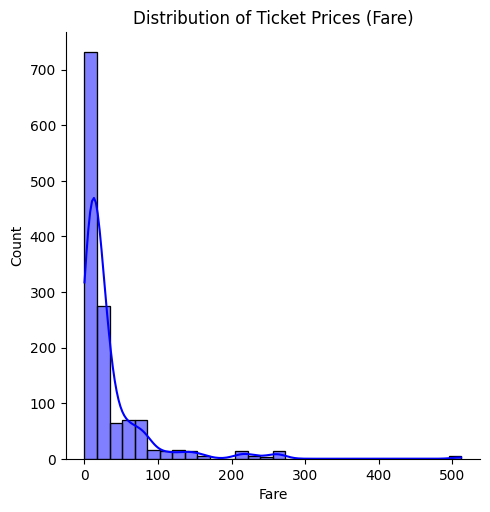

In [8]:
plt.figure(figsize=(10, 5))
sns.displot(df['fare'], bins=30, kde=True, color='blue')
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of Ticket Prices (Fare)")
plt.show()


## Violin Plot

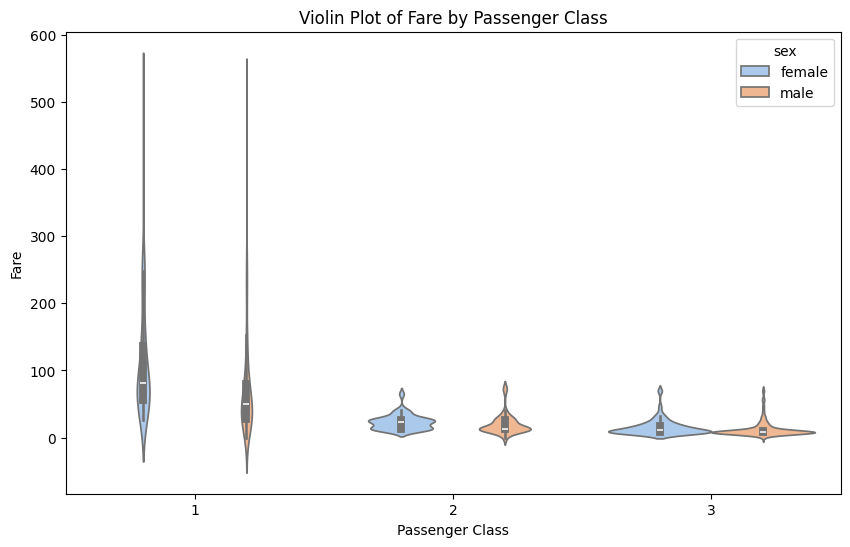

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(x='pclass',y='fare',data=df, hue='sex',palette='pastel')
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Violin Plot of Fare by Passenger Class")
plt.show()

## Displot: Age Distribution

<Figure size 1000x500 with 0 Axes>

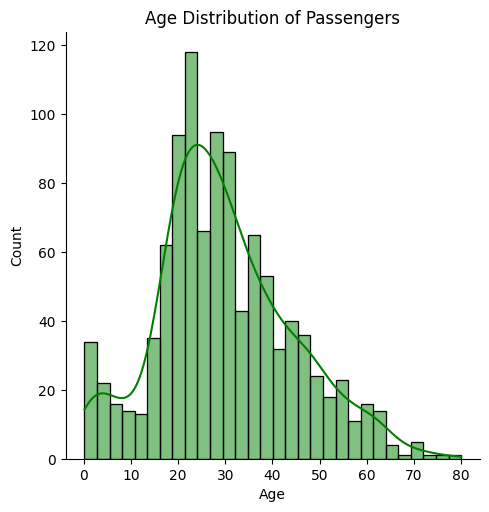

In [12]:
plt.figure(figsize=(10, 5))
sns.displot(df['age'].dropna(), bins=30, kde=True, color='green')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()

## Box Plot

C:\Users\91705\AppData\Local\Temp\ipykernel_11448\2464941253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pclass", y="age", data=df, palette="Set2")


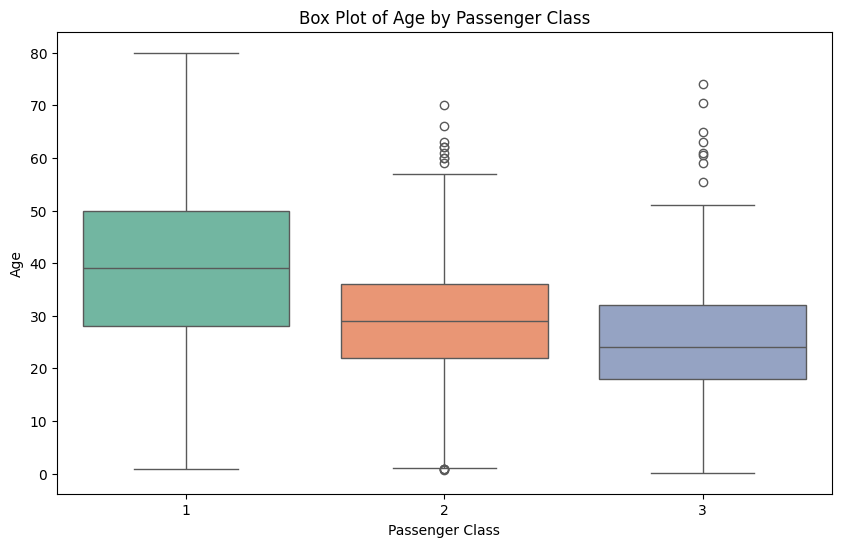

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pclass", y="age", data=df, palette="Set2")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Box Plot of Age by Passenger Class")
plt.show()


## Count plot

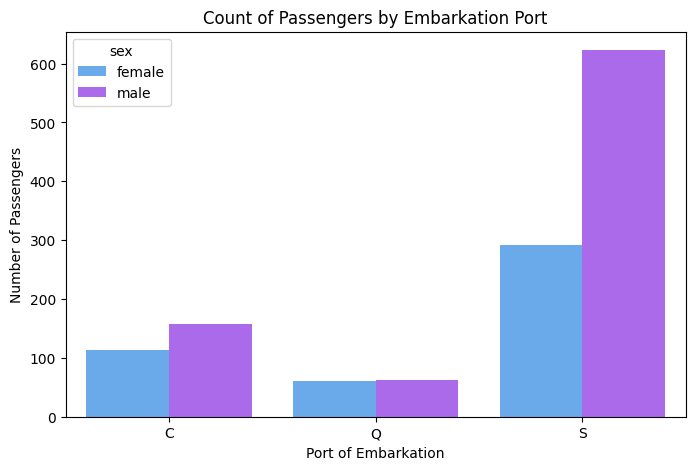

In [17]:
plt.figure(figsize=(8, 5))
# 'embarked' column might contain missing values; drop them for counting
sns.countplot(x="embarked", data=df.dropna(subset=['embarked']),hue='sex', palette="cool")
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of Passengers")
plt.title("Count of Passengers by Embarkation Port")
plt.show()

## Scatter Plot

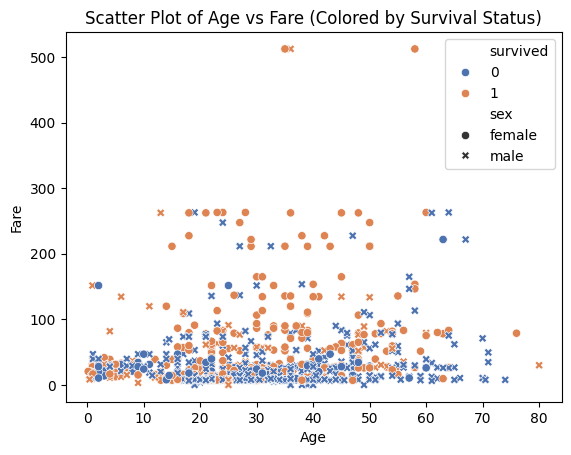

In [30]:
sns.scatterplot(x="age", y="fare", hue="survived", style="sex", data=df, palette="deep")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs Fare (Colored by Survival Status)")
plt.show()



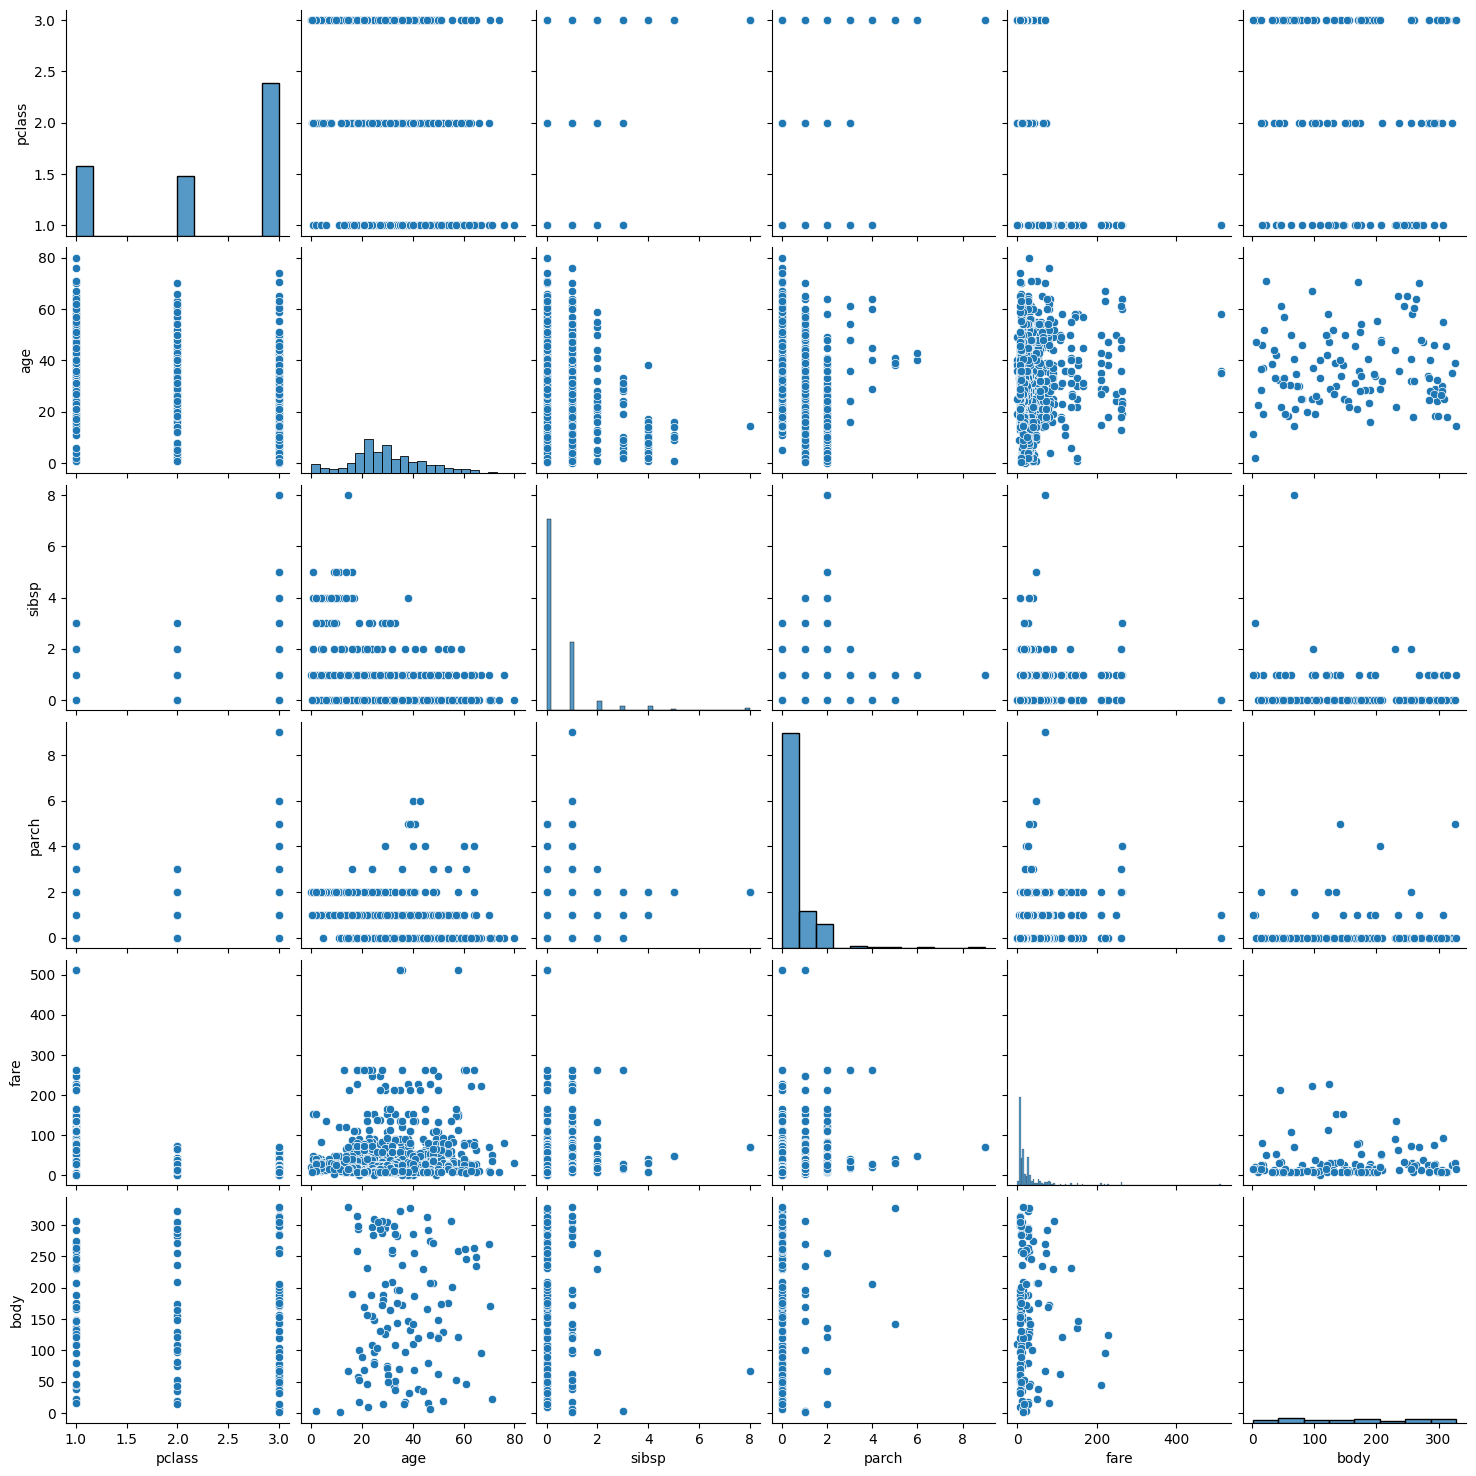

In [23]:
sns.pairplot(df)

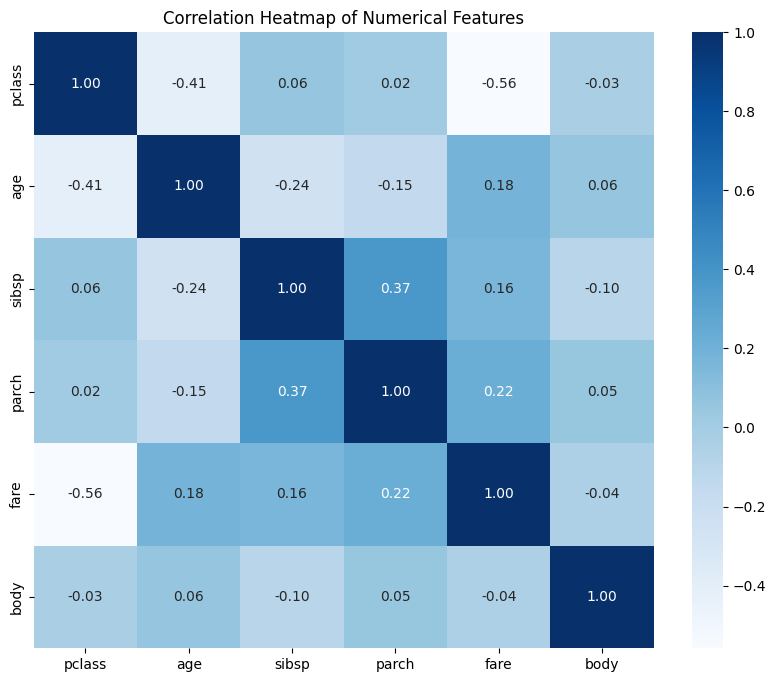

In [34]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()